In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Class 0: 509
Class 1: 39
Proportion: 13.0513 : 1


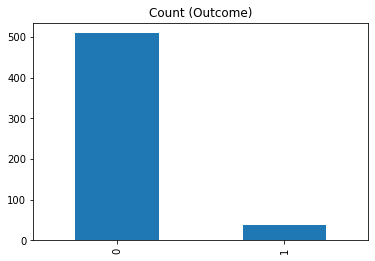

In [3]:
df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\Subject_1_and_2_Combined.csv')



df = df.drop('Date', 1)
df = df.drop('Gender', 1)

target_count = df.Outcome.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')

target_count.plot(kind='bar', title='Count (Outcome)');



In [4]:
# Class count
count_class_0, count_class_1 = df.Outcome.value_counts()

# Divide by class
df_class_0 = df[df['Outcome'] == 0]
df_class_1 = df[df['Outcome'] == 1]

Random under-sampling:
1    39
0    39
Name: Outcome, dtype: int64


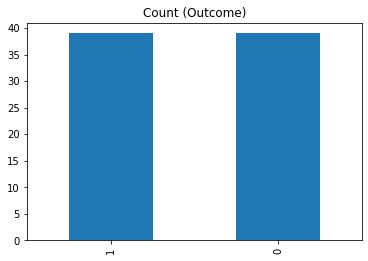

In [5]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');

Random over-sampling:
1    509
0    509
Name: Outcome, dtype: int64


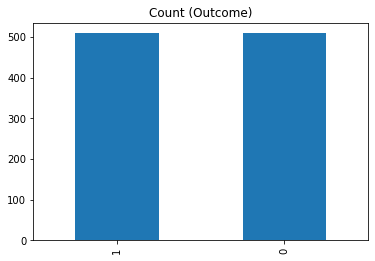

In [6]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (Outcome)');


In [7]:
#LOGISTICAL REGRESSION
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.30,random_state=2)

#Training and Predicting
#Import the Logisitcal Regression Library from SKLearn
from sklearn.linear_model import LogisticRegression

#create instance of logistical regression model called logmodel
logmodel=LogisticRegression()
#pass the data to the logmodel
logmodel.fit(x_train,y_train)

#make predictions with model on unseen test data
predictions = logmodel.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for Logistical Regression Model is:",accuracy_score(y_test, predictions)*100)
print("\nLogisitcal Regression Classification Report\n")
print(classification_report(y_test,predictions))
print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))



Accuracy score for Logistical Regression Model is: 93.13725490196079

Logisitcal Regression Classification Report

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       152
           1       0.92      0.95      0.93       154

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306


Logisitcal Regression AUCROC is 0.931


Confusion Matrix : 
 [[139  13]
 [  8 146]]
Accuracy :  0.9313725490196079
Sensitivity :  0.9144736842105263
Specificity :  0.948051948051948
Precision: 0.918239

Logisitcal Regression AUCROC is 0.931


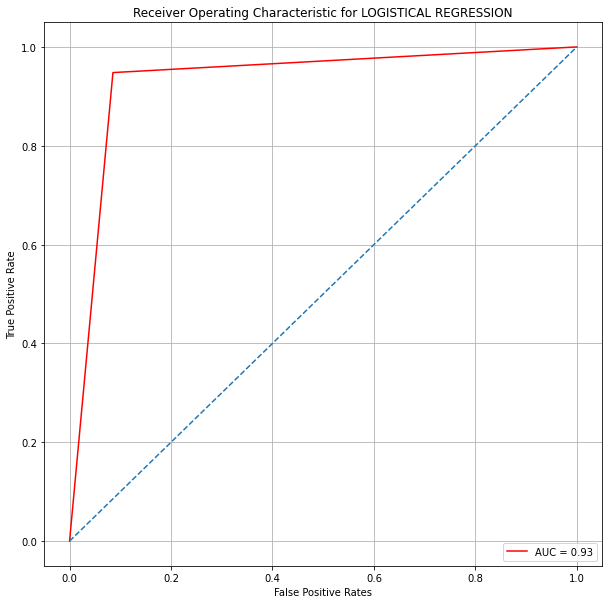

In [8]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score


cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for LOGISTICAL REGRESSION')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))


In [9]:
#DECISION TREE WITH GINI INDEX

#first 3 attributes are used for the x-axis
X = df_test_over.values[:, 0:4]
#attributes after number 3 are used for the y-axis
Y = df_test_over.values[:,5]

#import Accuracy Score to guage performance
from sklearn.metrics import accuracy_score

#Split the dataset using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 333)


#implement a depth of 5, with a minimum of 5 leaf nodes and a random state of 100
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state =333,
                               max_depth=5, min_samples_leaf=15)

#pass the training data to the decision tree
dt_clf_gini.fit(X_train, y_train)

#make prediction using unseen test data
y_pred_gini = dt_clf_gini.predict(X_test)

#methods used to show the performance metrics of the model
print ("\nAccuracy Score for Desicion Tree Model using Gini Index is ", accuracy_score(y_test,y_pred_gini)*100 )
print("\nDesicion Tree  Classification Report\n")
print(classification_report(y_test,y_pred_gini))



#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_gini)
print('Confusion Matrix for DT: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_gini)
print('Precision: %f' % precision)


Accuracy Score for Desicion Tree Model using Gini Index is  90.84967320261438

Desicion Tree  Classification Report

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       162
         1.0       0.90      0.90      0.90       144

    accuracy                           0.91       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.91      0.91      0.91       306

Confusion Matrix for DT: 
 [[148  14]
 [ 14 130]]
Accuracy :  0.9084967320261438
Sensitivity :  0.9135802469135802
Specificity :  0.9027777777777778
Precision: 0.902778



Logisitcal Regression AUCROC is 0.908


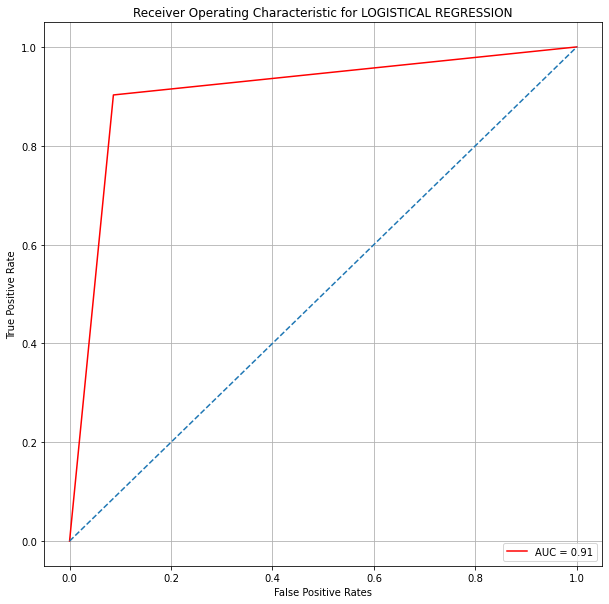

In [10]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_gini)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for LOGISTICAL REGRESSION')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nLogisitcal Regression AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_gini)))



Accuracy Score for Random Forest Model is 88.889

Random Forest roc-auc measure is 0.957

Random Forest  Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       153
           1       0.87      0.92      0.89       153

    accuracy                           0.89       306
   macro avg       0.89      0.89      0.89       306
weighted avg       0.89      0.89      0.89       306

Confusion Matrix for DT: 
 [[131  22]
 [ 12 141]]
Accuracy :  0.8888888888888888
Sensitivity :  0.8562091503267973
Specificity :  0.9215686274509803
Precision: 0.865031


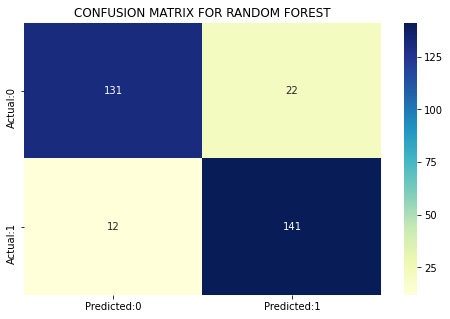

In [11]:
#RANDOM FOREST

X = df_test_over.iloc[:, :-3].values

#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
print('\nAccuracy Score for Random Forest Model is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)*100))
print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_class_rf)
print('Confusion Matrix for DT: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, y_pred_class_rf)
print('Precision: %f' % precision)

#create a confusion matrix to visually display the postive and negative prediction rate
cmrf=confusion_matrix(y_test,y_pred_class_rf)
conf_matrixrf=pd.DataFrame(data=cmrf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("CONFUSION MATRIX FOR RANDOM FOREST")
sns.heatmap(conf_matrixrf, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig('cmrfe.png')

In [12]:
#NEURAL NETWORK

## normalize the data

X = df_test_over.iloc[:, :3].values

#y-axis uses the variable outcome as its target variable
y = df_test_over["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation

model_1 = Sequential([
    Dense(12, input_shape=(3,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .002), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

 
    
#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\nAccuracy Score for Nerual Network is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)*100))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))


W0811 19:39:20.729519 54024 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 19:39:20.743484 54024 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 19:39:20.746474 54024 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.




************Start of Nerual Netwrok Summary*********

W0811 19:39:20.789360 54024 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 19:39:20.796375 54024 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0811 19:39:20.801326 54024 deprecation.py:323] From C:\Users\jamie\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 19:39:20.948932 54024 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.a


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Train on 814 samples, validate on 204 samples
Epoch 1/500
814/814 [==============================] - 0s 202us/step - loss: 0.6013 - acc: 0.7776 - val_loss: 0.5755 - val_acc: 0.8333
Epoch 2/500
814/814 [==============================] - 0s 28us/step - loss: 0.5943 - acc: 0.7776 - val_loss: 0.5679 - val_acc: 0.8333
Epoch 3/500
814/814 [==============================] - 0s 28us/step - loss: 0.5876 - acc: 0.7776 - val_loss: 0.5604 - val_acc: 0.8333
Epoch 4/500
814/814 [==============================] - 0s 26us/step - loss: 0.5811 - acc: 0.

Epoch 57/500
814/814 [==============================] - 0s 23us/step - loss: 0.4141 - acc: 0.8526 - val_loss: 0.3707 - val_acc: 0.9020
Epoch 58/500
814/814 [==============================] - 0s 23us/step - loss: 0.4127 - acc: 0.8526 - val_loss: 0.3692 - val_acc: 0.9020
Epoch 59/500
814/814 [==============================] - 0s 27us/step - loss: 0.4114 - acc: 0.8526 - val_loss: 0.3678 - val_acc: 0.9020
Epoch 60/500
814/814 [==============================] - 0s 26us/step - loss: 0.4101 - acc: 0.8526 - val_loss: 0.3663 - val_acc: 0.9020
Epoch 61/500
814/814 [==============================] - 0s 25us/step - loss: 0.4088 - acc: 0.8526 - val_loss: 0.3650 - val_acc: 0.9020
Epoch 62/500
814/814 [==============================] - 0s 28us/step - loss: 0.4075 - acc: 0.8526 - val_loss: 0.3636 - val_acc: 0.9020
Epoch 63/500
814/814 [==============================] - 0s 25us/step - loss: 0.4063 - acc: 0.8526 - val_loss: 0.3623 - val_acc: 0.9020
Epoch 64/500
814/814 [==============================] -

814/814 [==============================] - 0s 23us/step - loss: 0.3683 - acc: 0.8563 - val_loss: 0.3212 - val_acc: 0.8873
Epoch 118/500
814/814 [==============================] - 0s 26us/step - loss: 0.3679 - acc: 0.8563 - val_loss: 0.3208 - val_acc: 0.8873
Epoch 119/500
814/814 [==============================] - 0s 27us/step - loss: 0.3676 - acc: 0.8563 - val_loss: 0.3204 - val_acc: 0.8873
Epoch 120/500
814/814 [==============================] - 0s 24us/step - loss: 0.3672 - acc: 0.8563 - val_loss: 0.3201 - val_acc: 0.8873
Epoch 121/500
814/814 [==============================] - 0s 26us/step - loss: 0.3669 - acc: 0.8563 - val_loss: 0.3197 - val_acc: 0.8873
Epoch 122/500
814/814 [==============================] - 0s 25us/step - loss: 0.3665 - acc: 0.8563 - val_loss: 0.3193 - val_acc: 0.8873
Epoch 123/500
814/814 [==============================] - 0s 24us/step - loss: 0.3662 - acc: 0.8563 - val_loss: 0.3190 - val_acc: 0.8873
Epoch 124/500
814/814 [==============================] - 0s 25

814/814 [==============================] - 0s 22us/step - loss: 0.3546 - acc: 0.8698 - val_loss: 0.3064 - val_acc: 0.8922
Epoch 178/500
814/814 [==============================] - 0s 23us/step - loss: 0.3545 - acc: 0.8698 - val_loss: 0.3063 - val_acc: 0.8922
Epoch 179/500
814/814 [==============================] - 0s 25us/step - loss: 0.3543 - acc: 0.8698 - val_loss: 0.3061 - val_acc: 0.8922
Epoch 180/500
814/814 [==============================] - 0s 22us/step - loss: 0.3542 - acc: 0.8698 - val_loss: 0.3060 - val_acc: 0.8922
Epoch 181/500
814/814 [==============================] - 0s 24us/step - loss: 0.3541 - acc: 0.8698 - val_loss: 0.3058 - val_acc: 0.8922
Epoch 182/500
814/814 [==============================] - 0s 22us/step - loss: 0.3539 - acc: 0.8698 - val_loss: 0.3057 - val_acc: 0.8922
Epoch 183/500
814/814 [==============================] - 0s 21us/step - loss: 0.3538 - acc: 0.8698 - val_loss: 0.3055 - val_acc: 0.8922
Epoch 184/500
814/814 [==============================] - 0s 21

814/814 [==============================] - 0s 21us/step - loss: 0.3486 - acc: 0.8698 - val_loss: 0.3003 - val_acc: 0.8922
Epoch 238/500
814/814 [==============================] - 0s 21us/step - loss: 0.3485 - acc: 0.8698 - val_loss: 0.3002 - val_acc: 0.8922
Epoch 239/500
814/814 [==============================] - 0s 22us/step - loss: 0.3484 - acc: 0.8698 - val_loss: 0.3002 - val_acc: 0.8922
Epoch 240/500
814/814 [==============================] - 0s 23us/step - loss: 0.3483 - acc: 0.8698 - val_loss: 0.3001 - val_acc: 0.8922
Epoch 241/500
814/814 [==============================] - 0s 21us/step - loss: 0.3483 - acc: 0.8698 - val_loss: 0.3000 - val_acc: 0.8922
Epoch 242/500
814/814 [==============================] - 0s 20us/step - loss: 0.3482 - acc: 0.8698 - val_loss: 0.2999 - val_acc: 0.8922
Epoch 243/500
814/814 [==============================] - 0s 22us/step - loss: 0.3481 - acc: 0.8698 - val_loss: 0.2999 - val_acc: 0.8922
Epoch 244/500
814/814 [==============================] - 0s 22

814/814 [==============================] - 0s 21us/step - loss: 0.3449 - acc: 0.8698 - val_loss: 0.2969 - val_acc: 0.8922
Epoch 298/500
814/814 [==============================] - 0s 21us/step - loss: 0.3449 - acc: 0.8698 - val_loss: 0.2969 - val_acc: 0.8922
Epoch 299/500
814/814 [==============================] - 0s 21us/step - loss: 0.3448 - acc: 0.8698 - val_loss: 0.2968 - val_acc: 0.8922
Epoch 300/500
814/814 [==============================] - 0s 21us/step - loss: 0.3448 - acc: 0.8698 - val_loss: 0.2967 - val_acc: 0.8922
Epoch 301/500
814/814 [==============================] - 0s 21us/step - loss: 0.3447 - acc: 0.8698 - val_loss: 0.2967 - val_acc: 0.8922
Epoch 302/500
814/814 [==============================] - 0s 21us/step - loss: 0.3447 - acc: 0.8698 - val_loss: 0.2966 - val_acc: 0.8922
Epoch 303/500
814/814 [==============================] - 0s 21us/step - loss: 0.3446 - acc: 0.8698 - val_loss: 0.2966 - val_acc: 0.8922
Epoch 304/500
814/814 [==============================] - 0s 22

814/814 [==============================] - 0s 21us/step - loss: 0.3422 - acc: 0.8698 - val_loss: 0.2944 - val_acc: 0.8922
Epoch 358/500
814/814 [==============================] - 0s 20us/step - loss: 0.3421 - acc: 0.8698 - val_loss: 0.2944 - val_acc: 0.8922
Epoch 359/500
814/814 [==============================] - 0s 22us/step - loss: 0.3421 - acc: 0.8698 - val_loss: 0.2944 - val_acc: 0.8922
Epoch 360/500
814/814 [==============================] - 0s 21us/step - loss: 0.3420 - acc: 0.8698 - val_loss: 0.2944 - val_acc: 0.8922
Epoch 361/500
814/814 [==============================] - 0s 22us/step - loss: 0.3420 - acc: 0.8698 - val_loss: 0.2943 - val_acc: 0.8922
Epoch 362/500
814/814 [==============================] - 0s 22us/step - loss: 0.3420 - acc: 0.8698 - val_loss: 0.2943 - val_acc: 0.8922
Epoch 363/500
814/814 [==============================] - 0s 21us/step - loss: 0.3419 - acc: 0.8698 - val_loss: 0.2943 - val_acc: 0.8922
Epoch 364/500
814/814 [==============================] - 0s 21

814/814 [==============================] - 0s 22us/step - loss: 0.3398 - acc: 0.8698 - val_loss: 0.2926 - val_acc: 0.8922
Epoch 418/500
814/814 [==============================] - 0s 22us/step - loss: 0.3398 - acc: 0.8698 - val_loss: 0.2926 - val_acc: 0.8922
Epoch 419/500
814/814 [==============================] - 0s 22us/step - loss: 0.3398 - acc: 0.8698 - val_loss: 0.2926 - val_acc: 0.8922
Epoch 420/500
814/814 [==============================] - 0s 21us/step - loss: 0.3397 - acc: 0.8698 - val_loss: 0.2925 - val_acc: 0.8922
Epoch 421/500
814/814 [==============================] - 0s 21us/step - loss: 0.3397 - acc: 0.8698 - val_loss: 0.2925 - val_acc: 0.8922
Epoch 422/500
814/814 [==============================] - 0s 21us/step - loss: 0.3397 - acc: 0.8698 - val_loss: 0.2925 - val_acc: 0.8922
Epoch 423/500
814/814 [==============================] - 0s 21us/step - loss: 0.3396 - acc: 0.8698 - val_loss: 0.2924 - val_acc: 0.8922
Epoch 424/500
814/814 [==============================] - 0s 21

814/814 [==============================] - 0s 23us/step - loss: 0.3378 - acc: 0.8661 - val_loss: 0.2910 - val_acc: 0.9069
Epoch 478/500
814/814 [==============================] - 0s 21us/step - loss: 0.3378 - acc: 0.8661 - val_loss: 0.2910 - val_acc: 0.9069
Epoch 479/500
814/814 [==============================] - 0s 22us/step - loss: 0.3377 - acc: 0.8661 - val_loss: 0.2910 - val_acc: 0.9069
Epoch 480/500
814/814 [==============================] - 0s 23us/step - loss: 0.3377 - acc: 0.8661 - val_loss: 0.2909 - val_acc: 0.9069
Epoch 481/500
814/814 [==============================] - 0s 22us/step - loss: 0.3377 - acc: 0.8661 - val_loss: 0.2909 - val_acc: 0.9069
Epoch 482/500
814/814 [==============================] - 0s 22us/step - loss: 0.3376 - acc: 0.8661 - val_loss: 0.2909 - val_acc: 0.9069
Epoch 483/500
814/814 [==============================] - 0s 22us/step - loss: 0.3376 - acc: 0.8661 - val_loss: 0.2909 - val_acc: 0.9069
Epoch 484/500
814/814 [==============================] - 0s 22

In [13]:

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score, roc_curve, accuracy_score, recall_score

precision = precision_score(y_test, y_pred_class_nn_1)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_class_nn_1)
print('Recall: %f' % recall)

cm=confusion_matrix(y_test, y_pred_class_nn_1)
print('Confusion Matrix : \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)



Precision: 0.919192
Recall: 0.892157
Confusion Matrix : 
 [[94  8]
 [11 91]]
Accuracy :  0.9068627450980392
Sensitivity :  0.9215686274509803
Specificity :  0.8921568627450981


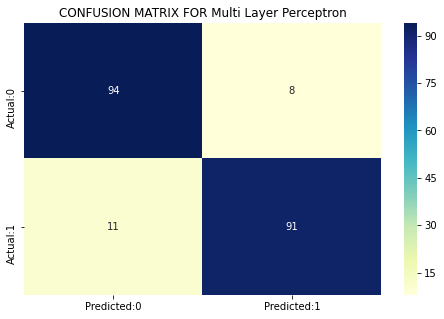

In [14]:

#create a confusion matrix to visually display the postive and negative prediction rate
cmrf=confusion_matrix(y_test,y_pred_class_nn_1)
conf_matrixrf=pd.DataFrame(data=cmrf,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("CONFUSION MATRIX FOR Multi Layer Perceptron")
sns.heatmap(conf_matrixrf, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig('MLPCM.png')


Nerual Network AUCROC is 0.951


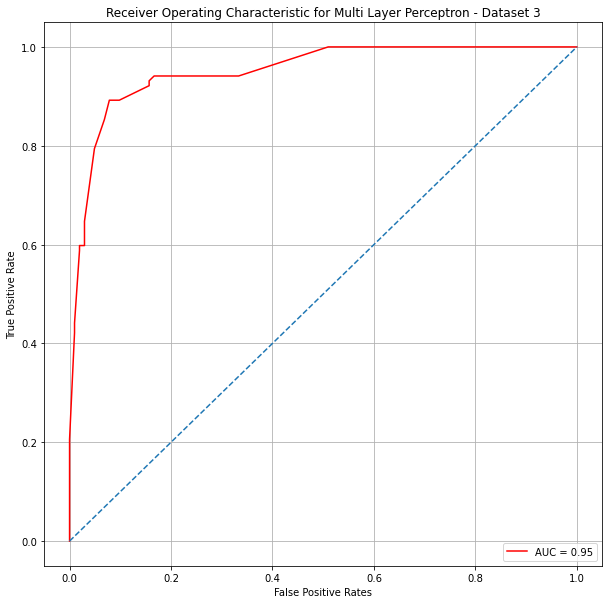

In [15]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob_nn_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc



plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Multi Layer Perceptron - Dataset 3')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc1221.png')


print('\nNerual Network AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))



In [18]:

# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.model_selection import train_test_split

#Split the epileptic data: 70%training||30% testing using the SKLearn train_test_Split
x_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.20,random_state=1)

clf = SVC(kernel='linear', C = 1.0)

# fitting x samples and y classes 
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for SVM is:",accuracy_score(y_test, predictions)*100)
print("\nSVM Classification Report\n")
print(classification_report(y_test,predictions))
print('\nSVM AUCROC is {:.3f}'.format(roc_auc_score(y_test,predictions)))

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predictions)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
sns.set()


Accuracy score for SVM is: 92.15686274509804

SVM Classification Report

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       102
           1       0.92      0.92      0.92       102

    accuracy                           0.92       204
   macro avg       0.92      0.92      0.92       204
weighted avg       0.92      0.92      0.92       204


SVM AUCROC is 0.922
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[94  8]
 [ 8 94]]
Accuracy :  0.9215686274509803
Sensitivity :  0.9215686274509803
Specificity :  0.9215686274509803
Precision: 0.921569


ValueError: Could not interpret input 'Fatigue'

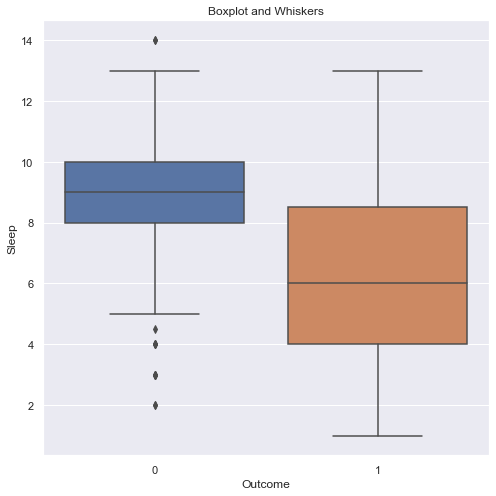

In [45]:
plt.figure(figsize = (8,8))
plt.title("Boxplot and Whiskers")
sns.boxplot(x='Outcome', y='Sleep', data=df)
sns.boxplot(x='Outcome', y='Fatigue', data=df)
plt.savefig('bp.png')

TypeError: boxplot() got an unexpected keyword argument 'size'

<Figure size 1296x1296 with 0 Axes>

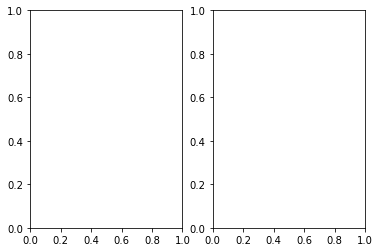

In [34]:



fig = plt.figure(figsize=(18, 18))
f, axes = plt.subplots(1, 2)
sns.boxplot(  y="Sleep", x= "Outcome", data=df,  orient='v' , ax=axes[0],size=[10,5])
sns.boxplot(  y="Fatigued", x= "Outcome", data=df,  orient='v' , ax=axes[1],fig=[10,5])
plt.show()


In [30]:
from sklearn.model_selection import train_test_split

X_train, x_test,y_train,y_test = train_test_split(df_test_over.drop('Outcome',axis=1),df_test_over['Outcome'],
                                                  test_size=0.30,random_state=333)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

import numpy as np

predicted = model.predict(x_test)

print(np.mean(predicted == y_test))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))


#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy score for SVM is:",accuracy_score(y_test, predicted)*100)
print("\nSVM Classification Report\n")
print(classification_report(y_test,predicted))
print('\nSVM AUCROC is {:.3f}'.format(roc_auc_score(y_test,predicted)))


#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, predicted)
print('Confusion Matrix for LOGISTICAL REGRESSION: \n', cm)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)

0.8725490196078431
[[145  17]
 [ 22 122]]
Accuracy score for SVM is: 87.25490196078431

SVM Classification Report

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       162
           1       0.88      0.85      0.86       144

    accuracy                           0.87       306
   macro avg       0.87      0.87      0.87       306
weighted avg       0.87      0.87      0.87       306


SVM AUCROC is 0.871
Confusion Matrix for LOGISTICAL REGRESSION: 
 [[145  17]
 [ 22 122]]
Accuracy :  0.8725490196078431
Sensitivity :  0.8950617283950617
Specificity :  0.8472222222222222
Precision: 0.877698
